# Official Data

In [1]:
import os
os.chdir("../../")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.python.PdfParse import *
from scripts.python.ts_utils import *
from scripts.python.utils import *

PALAU's descriptive statistics:


,total
count,184.000000
mean,7730.008361
std,4060.315357
min,1.000000
25%,6056.250000
50%,8384.000000
75%,10458.250000
max,17711.000000


PALAU's ADF test results:


,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
total,-1.230261,0.660444,13.0,170.0,-3.469413,-2.878696,-2.575917


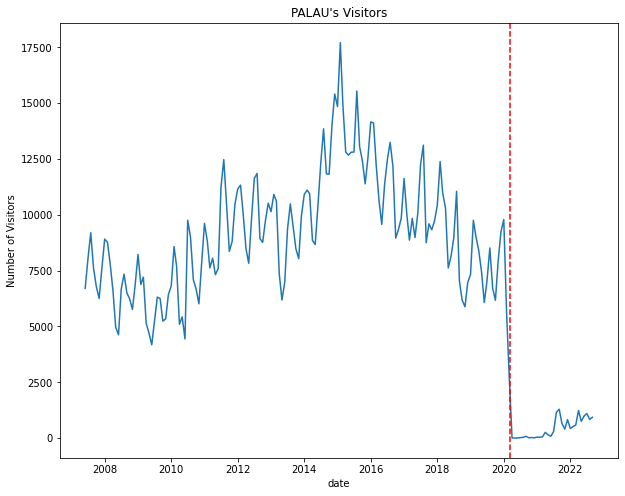



SOLOMON's descriptive statistics:


,total
count,144.000000
mean,1818.659722
std,613.188425
min,2.000000
25%,1590.750000
50%,1856.000000
75%,2196.000000
max,3122.000000


SOLOMON's ADF test results:


,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
total,-2.393654,0.143535,14.0,129.0,-3.482088,-2.884219,-2.578864


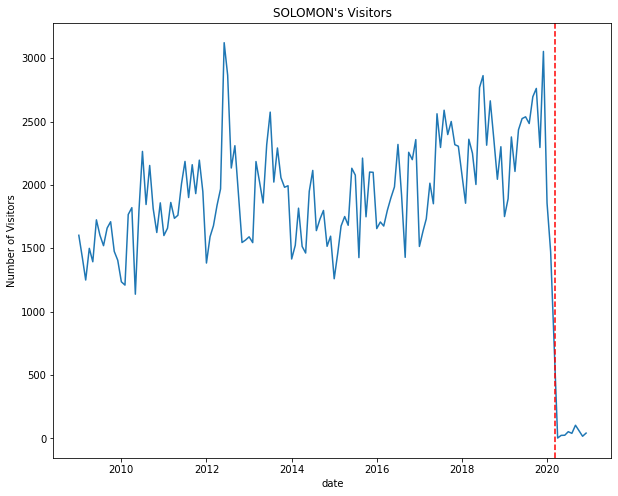



VANUATU's descriptive statistics:


,total
count,225.000000
mean,6893.822222
std,3357.829027
min,0.000000
25%,5244.000000
50%,7211.000000
75%,9303.000000
max,13184.000000


VANUATU's ADF test results:


,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
total,-2.425354,0.134708,13.0,211.0,-3.461727,-2.875337,-2.574124


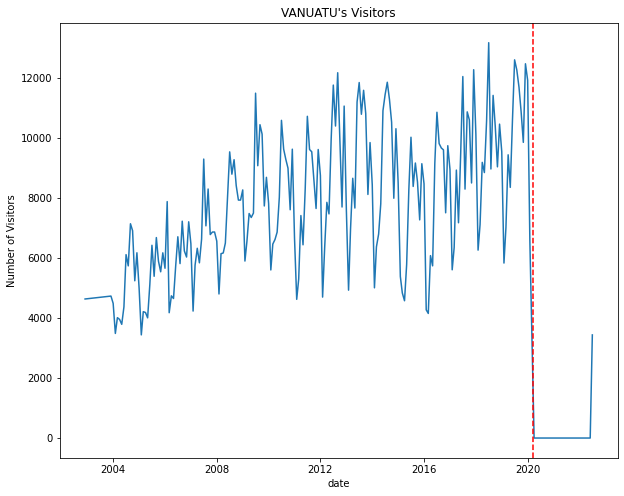



SAMOA's descriptive statistics:


,total
count,242.000000
mean,9512.599174
std,4693.514588
min,0.000000
25%,7445.500000
50%,9657.000000
75%,11900.000000
max,24647.000000


SAMOA's ADF test results:


,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
total,-3.403589,0.010837,14.0,227.0,-3.45949,-2.874358,-2.573602


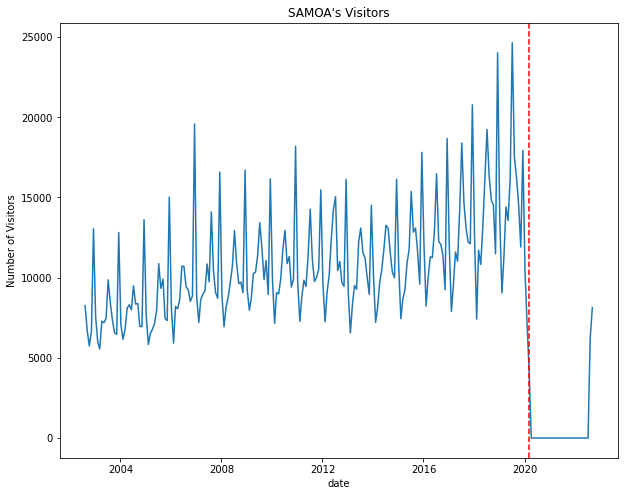



TONGA's descriptive statistics:


,total
count,146.000000
mean,5125.842466
std,2911.141373
min,0.000000
25%,3828.250000
50%,5306.500000
75%,6827.750000
max,13275.000000


TONGA's ADF test results:


,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
total,-1.147026,0.695959,10.0,135.0,-3.479743,-2.883198,-2.57832


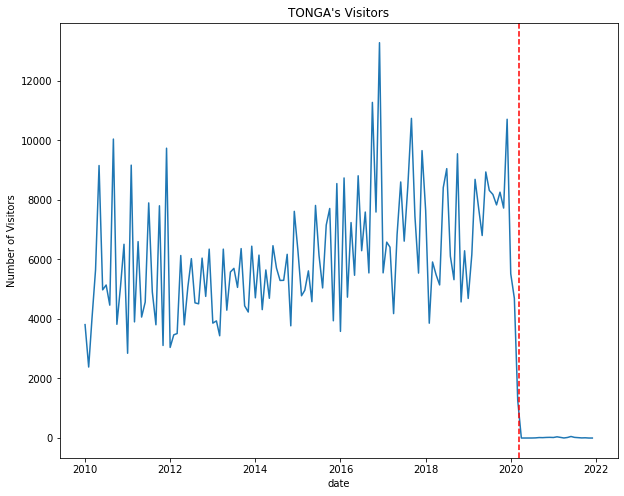

In [3]:
for country in ["palau", "solomon", "vanuatu", "samoa", "tonga"]:
    path = os.getcwd() + "/data/tourism/" + str(country) + \
        "/intermediate/" + str(country) + "_monthly_visitor.csv"
    df = pd.read_csv(path).drop("Unnamed: 0", axis=1)
    df.columns = [col.lower() for col in df.columns]
    df["country"] = str(country)
    temp = df[["date", "country", "total"]]
    temp["date"] = pd.to_datetime(temp["date"])
    
    # Descriptive Statistics
    print(f"{country.upper()}'s descriptive statistics:")
    display(temp.describe())

    # Stationarity Test
    print(f"{country.upper()}'s ADF test results:")
    display(get_adf_df(temp, ["total"]))

    # Plots
    fig,ax=plt.subplots(figsize=(10, 8))
    sns.lineplot(x="date", y="total", data=temp)
    plt.axvline(pd.Timestamp(2020, 3, 11), color="r", linestyle="--")
    plt.ylabel("Number of Visitors")
    plt.title(str(country).upper() + "'s Visitors")
    plt.show()
    
    print("\n")